In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from keras.layers import *
from pyvi import ViTokenizer, ViPosTagger
from tqdm import tqdm
import numpy as np
import gensim
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

dir_path = os.path.dirname(os.path.realpath(os.getcwd()))
dir_path = os.path.join(dir_path, 'code')

def get_data(folder_path):
    X = []
    y = []
    dirs = os.listdir(folder_path)
    for path in dirs:
        file_paths = os.listdir(os.path.join(folder_path, path))
        for file_path in tqdm(file_paths):
            with open(os.path.join(folder_path, path, file_path), 'r', encoding="utf-8") as f:
                lines = f.readlines()
                lines = ' '.join(lines)
                lines = gensim.utils.simple_preprocess(lines)
                lines = ' '.join(lines)
                lines = ViTokenizer.tokenize(lines)
#                 sentence = ' '.join(words)
#                 print(lines)
                X.append(lines)
                y.append(path)
#             break
#         break
    return X, y

data = os.path.join(dir_path, 'data_links')
X_data, y_data = get_data(data)

100%|██████████| 4910/4910 [01:48<00:00, 45.40it/s]


In [3]:
import pandas as pd  
df = pd.DataFrame(list(zip(X_data, y_data)), columns = ['text', 'lable'])  
print(df)  

                                                    text          lable
0      cháy căn_hộ toà nhà_tầng sài_gòn lửa cháy dữ_d...  Chinhtrixahoi
1      chủ xe cá_nhân có_thể được xác_nhận điện_tử gi...  Chinhtrixahoi
2      không xây bãi xe_ngầm tầng sân golf trung_tâm ...  Chinhtrixahoi
3      bộ_đội việt_nam phát_hiện vị_trí có dấu_hiệu s...  Chinhtrixahoi
4      vì sao đường võ chí công chưa hoàn_thành xe_kh...  Chinhtrixahoi
...                                                  ...            ...
48893  hlv srimaka thái lan không có đối_thủ sea game...        Thethao
48894  cụ ông tuổi nước_rút ngoạn_mục để vô_địch thế_...        Thethao
48895  cầu_thủ indonesia khóc vì mất quyền dự world_c...        Thethao
48896  alcaraz_đấu sinner bán_kết miami open mỹcarlos...        Thethao
48897  rooney dự_đoán man city vô_địch ngoại_hạng anh...        Thethao

[48898 rows x 2 columns]


<AxesSubplot: xlabel='word_length', ylabel='Count'>

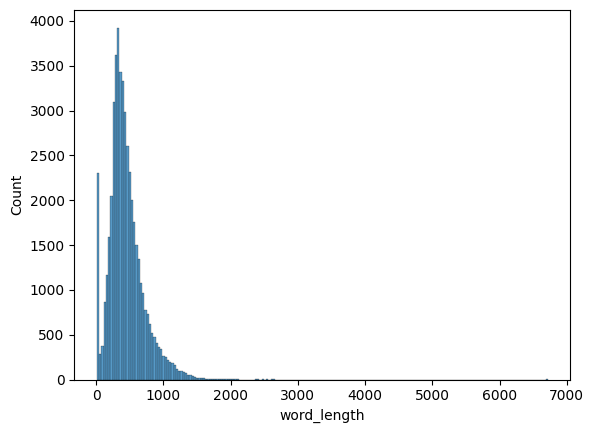

In [4]:
def wl(text):
  return len(text.split(" "))
df['word_length'] = df['text'].apply(wl)
sns.histplot(data=df, x="word_length", bins=200)

In [5]:
df_chinhtri = df[df['lable']=='Chinhtrixahoi']
df_doisong = df[df['lable']=='Doisong']
df_khoahoc = df[df['lable']=='Khoahoc']
df_kinhdoanh = df[df['lable']=='Kinhdoanh']
df_phapluat = df[df['lable']=='Phapluat']
df_suckhoe = df[df['lable']=='Suckhoe']
df_thegioi = df[df['lable']=='Thegioi']
df_thethao = df[df['lable']=='Thethao']
df_giaitri = df[df['lable']=='Giaitri']
df_sohoa = df[df['lable']=='Sohoa']

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14868\1863438815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chinhtri['word_length'] = df_chinhtri['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

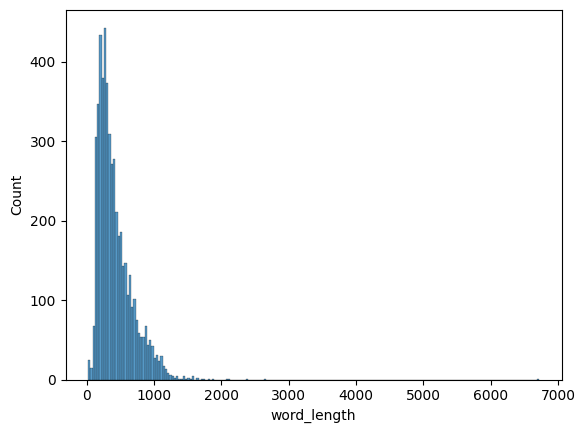

In [6]:
df_chinhtri['word_length'] = df_chinhtri['text'].apply(wl)
sns.histplot(data=df_chinhtri, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14868\2340140034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doisong['word_length'] = df_doisong['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

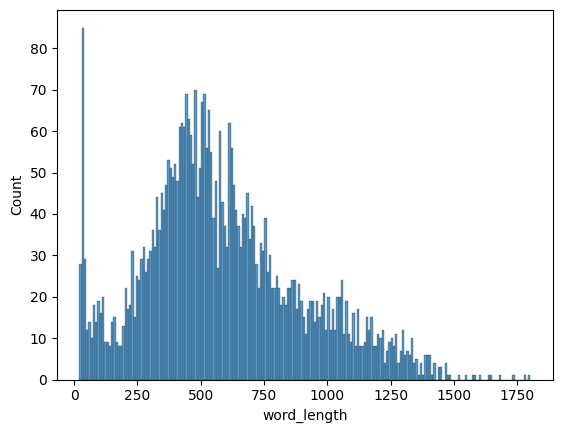

In [7]:
df_doisong['word_length'] = df_doisong['text'].apply(wl)
sns.histplot(data=df_doisong, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14868\271788771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_khoahoc['word_length'] = df_khoahoc['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

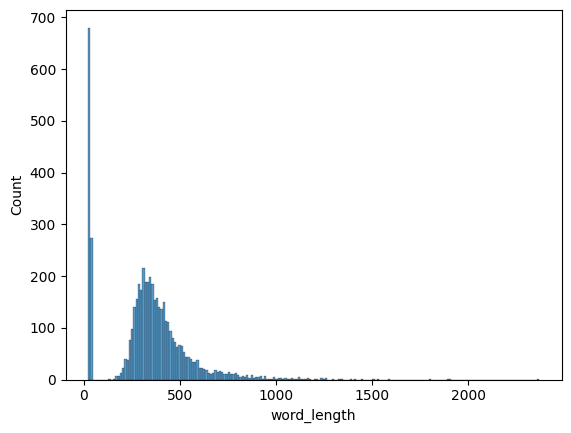

In [8]:
df_khoahoc['word_length'] = df_khoahoc['text'].apply(wl)
sns.histplot(data=df_khoahoc, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14868\1868496178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kinhdoanh['word_length'] = df_kinhdoanh['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

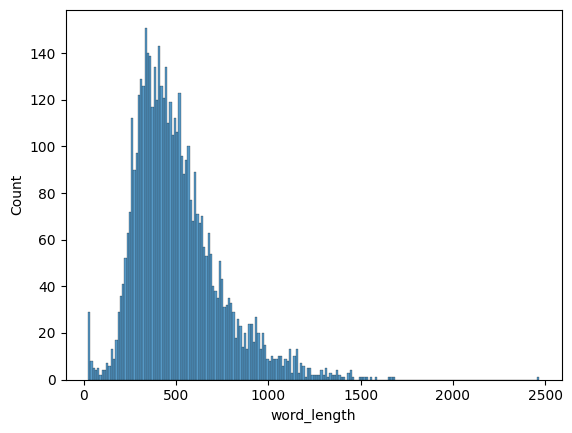

In [9]:
df_kinhdoanh['word_length'] = df_kinhdoanh['text'].apply(wl)
sns.histplot(data=df_kinhdoanh, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14868\3888704215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phapluat['word_length'] = df_phapluat['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

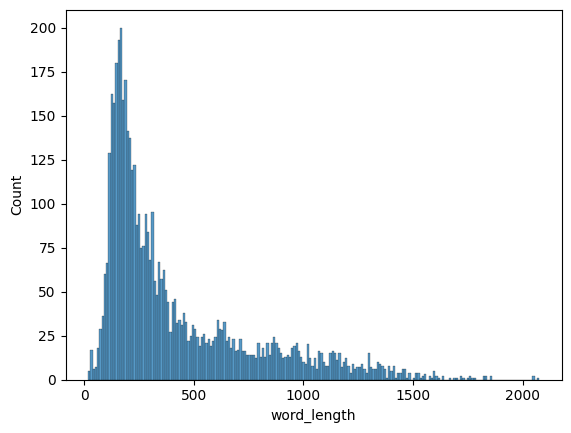

In [10]:
df_phapluat['word_length'] = df_phapluat['text'].apply(wl)
sns.histplot(data=df_phapluat, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14868\2687371686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suckhoe['word_length'] = df_suckhoe['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

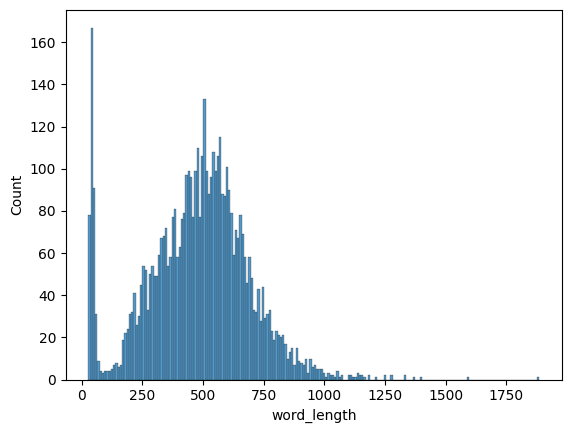

In [11]:
df_suckhoe['word_length'] = df_suckhoe['text'].apply(wl)
sns.histplot(data=df_suckhoe, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14868\3773760432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thegioi['word_length'] = df_thegioi['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

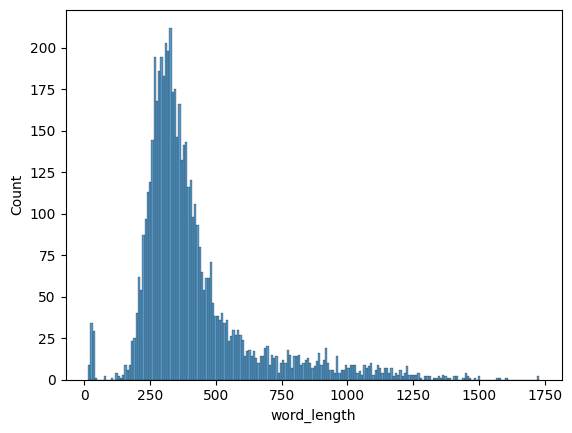

In [12]:
df_thegioi['word_length'] = df_thegioi['text'].apply(wl)
sns.histplot(data=df_thegioi, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14868\1918746575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thethao['word_length'] = df_thethao['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

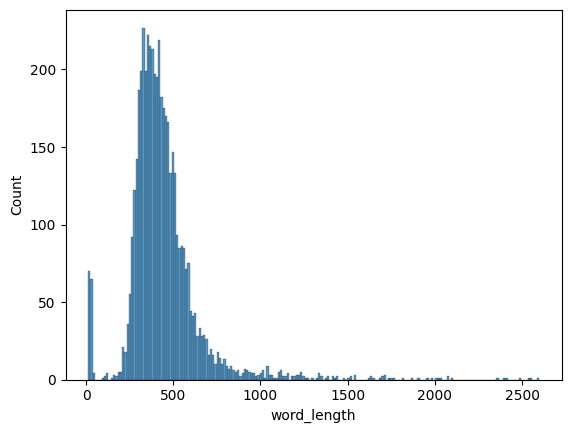

In [13]:
df_thethao['word_length'] = df_thethao['text'].apply(wl)
sns.histplot(data=df_thethao, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14868\2196652801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_giaitri['word_length'] = df_giaitri['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

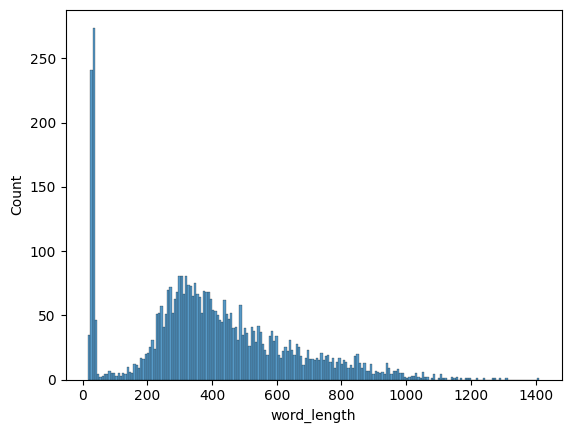

In [14]:
df_giaitri['word_length'] = df_giaitri['text'].apply(wl)
sns.histplot(data=df_giaitri, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14868\997336162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sohoa['word_length'] = df_sohoa['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

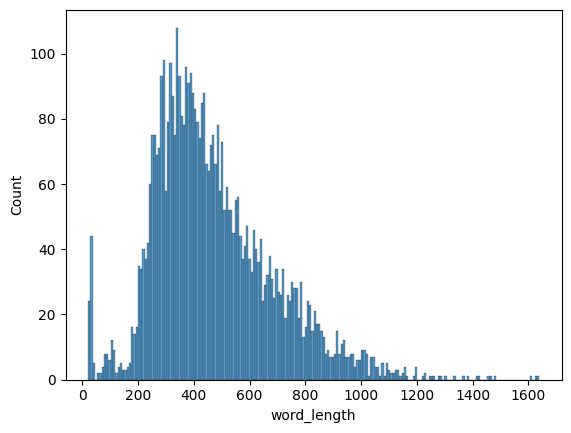

In [15]:
df_sohoa['word_length'] = df_sohoa['text'].apply(wl)
sns.histplot(data=df_sohoa, x="word_length", bins=200)

In [16]:
def GetStopword():
    text = []
    with open('vnsw.txt', encoding='utf-8') as f:
        lines = f.readlines()
    
    for i in lines:
        text.append(i.replace('\n', ''))
    
    return text

def RemoveStopword(text):
    text = text.split(' ')
    remove_stopword = [word for word in text if not word in GetStopword()]
    
    s = ''
    for i in remove_stopword:
        s += i + ' '
        
    return s
def preprocessing(text):
    text = RemoveStopword(text)
    return text

In [17]:
df.text

0        cháy căn_hộ toà nhà_tầng sài_gòn lửa cháy dữ_d...
1        chủ xe cá_nhân có_thể được xác_nhận điện_tử gi...
2        không xây bãi xe_ngầm tầng sân golf trung_tâm ...
3        bộ_đội việt_nam phát_hiện vị_trí có dấu_hiệu s...
4        vì sao đường võ chí công chưa hoàn_thành xe_kh...
                               ...                        
48893    hlv srimaka thái lan không có đối_thủ sea game...
48894    cụ ông tuổi nước_rút ngoạn_mục để vô_địch thế_...
48895    cầu_thủ indonesia khóc vì mất quyền dự world_c...
48896    alcaraz_đấu sinner bán_kết miami open mỹcarlos...
48897    rooney dự_đoán man city vô_địch ngoại_hạng anh...
Name: text, Length: 48898, dtype: object

In [111]:
df.text = df.text.apply(lambda text: preprocessing(text))
df

text          lable  \
0      cháy căn_hộ nhà_tầng sài_gòn lửa cháy dữ_dội c...  Chinhtrixahoi   
1      chủ xe cá_nhân có_thể xác_nhận điện_tử giãn ch...  Chinhtrixahoi   
2      xây bãi xe_ngầm tầng sân golf trung_tâm đà lạt...  Chinhtrixahoi   
3      bộ_đội việt_nam phát_hiện vị_trí dấu_hiệu sống...  Chinhtrixahoi   
4      đường võ chí công hoàn_thành xe_khách chạy quả...  Chinhtrixahoi   
...                                                  ...            ...   
48893  hlv srimaka thái lan đối_thủ sea games hlv wor...        Thethao   
48894  cụ nước_rút ngoạn_mục vô_địch thế_giới lanvđv ...        Thethao   
48895  cầu_thủ indonesia khóc quyền dự world_cup indo...        Thethao   
48896  alcaraz_đấu sinner bán_kết miami open mỹcarlos...        Thethao   
48897  rooney dự_đoán man city vô_địch ngoại_hạng anh...        Thethao   

       word_length  
0              292  
1              537  
2              287  
3              396  
4              768  
...            ...  
48893          303  
48894          342  
48895          453  
48896          328  
48897          291  

[48898 rows x 3 columns]

In [114]:
df.to_csv('data.csv')

In [120]:
data_after =pd.read_csv('data.csv')
data_after123 = data_after[['text','lable']]
data_after123

text          lable
0      cháy căn_hộ nhà_tầng sài_gòn lửa cháy dữ_dội c...  Chinhtrixahoi
1      chủ xe cá_nhân có_thể xác_nhận điện_tử giãn ch...  Chinhtrixahoi
2      xây bãi xe_ngầm tầng sân golf trung_tâm đà lạt...  Chinhtrixahoi
3      bộ_đội việt_nam phát_hiện vị_trí dấu_hiệu sống...  Chinhtrixahoi
4      đường võ chí công hoàn_thành xe_khách chạy quả...  Chinhtrixahoi
...                                                  ...            ...
48893  hlv srimaka thái lan đối_thủ sea games hlv wor...        Thethao
48894  cụ nước_rút ngoạn_mục vô_địch thế_giới lanvđv ...        Thethao
48895  cầu_thủ indonesia khóc quyền dự world_cup indo...        Thethao
48896  alcaraz_đấu sinner bán_kết miami open mỹcarlos...        Thethao
48897  rooney dự_đoán man city vô_địch ngoại_hạng anh...        Thethao

[48898 rows x 2 columns]

In [ ]:
data_after123 = data_after123[data_after123[]]

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14940\1930179263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_after123['word_length'] = data_after123['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

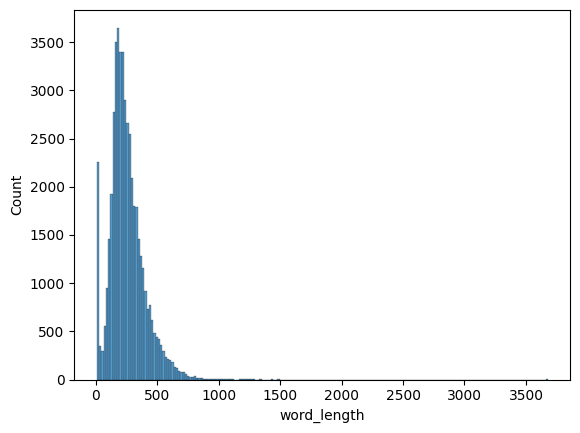

In [122]:
data_after123['word_length'] = data_after123['text'].apply(wl)
sns.histplot(data=data_after123, x="word_length", bins=200)

In [153]:
data_after123

text          lable  \
0      cháy căn_hộ nhà_tầng sài_gòn lửa cháy dữ_dội c...  Chinhtrixahoi   
1      chủ xe cá_nhân có_thể xác_nhận điện_tử giãn ch...  Chinhtrixahoi   
2      xây bãi xe_ngầm tầng sân golf trung_tâm đà lạt...  Chinhtrixahoi   
3      bộ_đội việt_nam phát_hiện vị_trí dấu_hiệu sống...  Chinhtrixahoi   
4      đường võ chí công hoàn_thành xe_khách chạy quả...  Chinhtrixahoi   
...                                                  ...            ...   
48893  hlv srimaka thái lan đối_thủ sea games hlv wor...        Thethao   
48894  cụ nước_rút ngoạn_mục vô_địch thế_giới lanvđv ...        Thethao   
48895  cầu_thủ indonesia khóc quyền dự world_cup indo...        Thethao   
48896  alcaraz_đấu sinner bán_kết miami open mỹcarlos...        Thethao   
48897  rooney dự_đoán man city vô_địch ngoại_hạng anh...        Thethao   

       word_length  
0              179  
1              283  
2              207  
3              260  
4              527  
...            ...  
48893          194  
48894          187  
48895          239  
48896          191  
48897          157  

[48898 rows x 3 columns]

In [157]:
daaa = data_after123[data_after123['word_length'] <100]
len(daaa)

4234

In [158]:
data_after123=data_after123[data_after123['word_length'] >100]

In [ ]:
data_after123.to_csv('data_after.csv')

In [159]:
data_chinhtri = data_after123[data_after123['lable']=='Chinhtrixahoi']
data_doisong = data_after123[data_after123['lable']=='Doisong']
data_khoahoc = data_after123[data_after123['lable']=='Khoahoc']
data_kinhdoanh = data_after123[data_after123['lable']=='Kinhdoanh']
data_phapluat = data_after123[data_after123['lable']=='Phapluat']
data_suckhoe = data_after123[data_after123['lable']=='Suckhoe']
data_thegioi = data_after123[data_after123['lable']=='Thegioi']
data_thethao = data_after123[data_after123['lable']=='Thethao']
data_giaitri = data_after123[data_after123['lable']=='Giaitri']
data_sohoa = data_after123[data_after123['lable']=='Sohoa']

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14940\4205071544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chinhtri['word_length'] = data_chinhtri['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

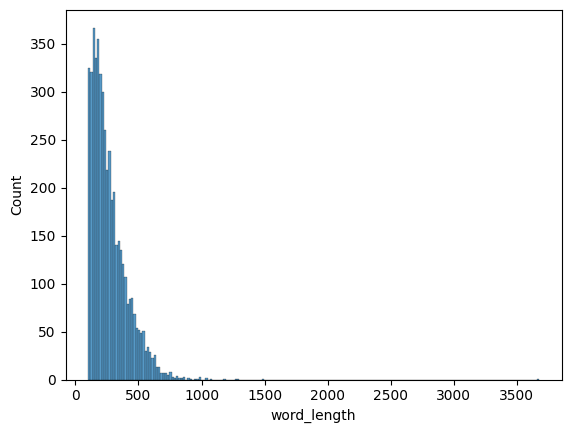

In [160]:
data_chinhtri['word_length'] = data_chinhtri['text'].apply(wl)
sns.histplot(data=data_chinhtri, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14940\810539051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_doisong['word_length'] = data_doisong['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

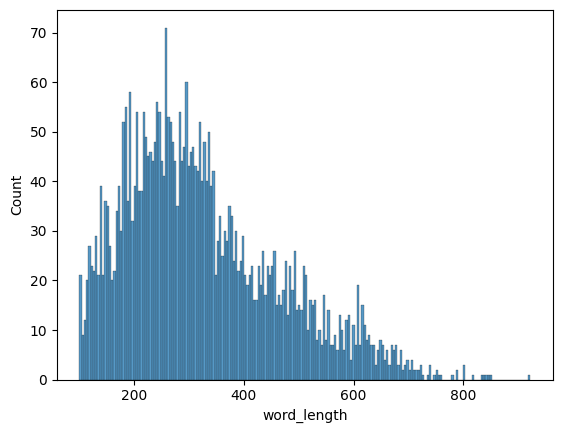

In [161]:
data_doisong['word_length'] = data_doisong['text'].apply(wl)
sns.histplot(data=data_doisong, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14940\2774181225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_khoahoc['word_length'] = data_khoahoc['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

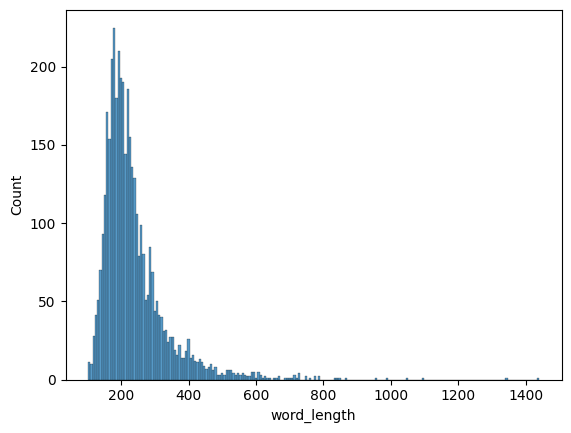

In [162]:
data_khoahoc['word_length'] = data_khoahoc['text'].apply(wl)
sns.histplot(data=data_khoahoc, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14940\600497017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kinhdoanh['word_length'] = data_kinhdoanh['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

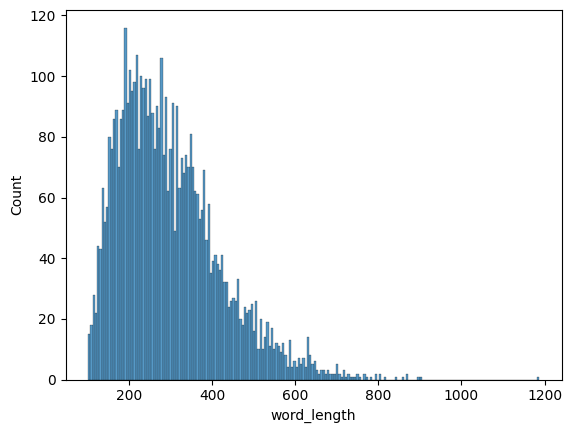

In [163]:
data_kinhdoanh['word_length'] = data_kinhdoanh['text'].apply(wl)
sns.histplot(data=data_kinhdoanh, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14940\398160597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_phapluat['word_length'] = data_phapluat['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

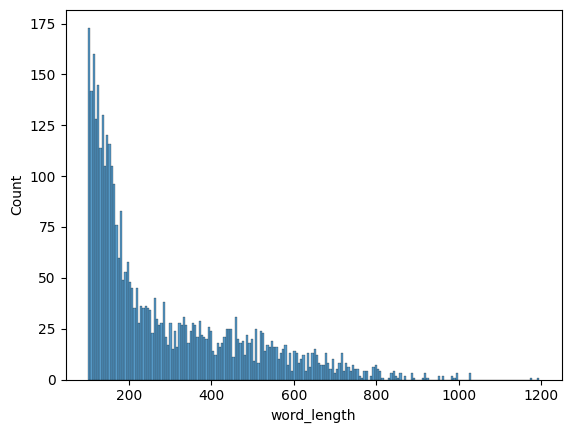

In [164]:
data_phapluat['word_length'] = data_phapluat['text'].apply(wl)
sns.histplot(data=data_phapluat, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14940\2615816625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_suckhoe['word_length'] = data_suckhoe['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

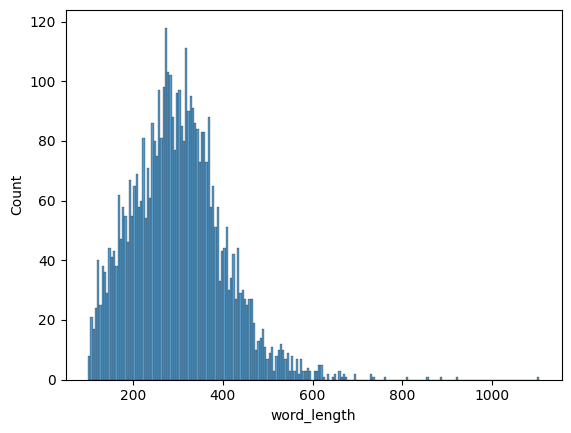

In [165]:
data_suckhoe['word_length'] = data_suckhoe['text'].apply(wl)
sns.histplot(data=data_suckhoe, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14940\2296459656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_thegioi['word_length'] = data_thegioi['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

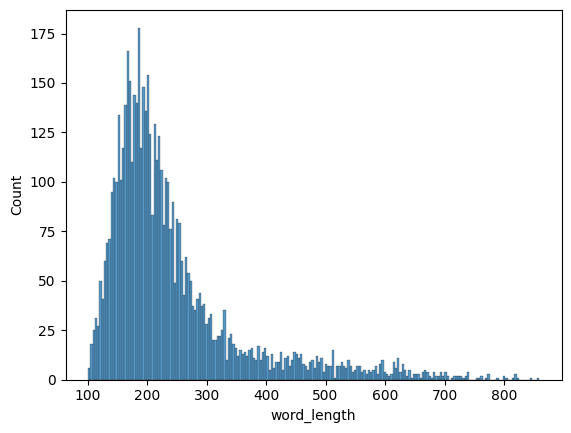

In [166]:
data_thegioi['word_length'] = data_thegioi['text'].apply(wl)
sns.histplot(data=data_thegioi, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14940\3516482255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_thethao['word_length'] = data_thethao['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

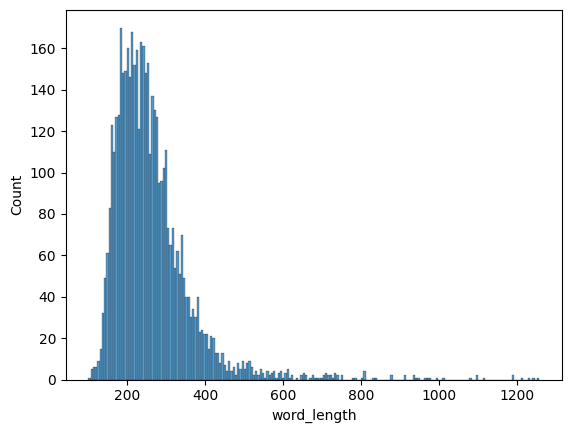

In [168]:
data_thethao['word_length'] = data_thethao['text'].apply(wl)
sns.histplot(data=data_thethao, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14940\1559873897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_giaitri['word_length'] = data_giaitri['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

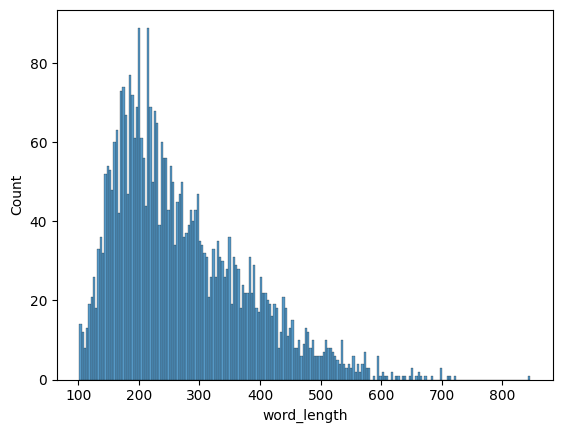

In [169]:
data_giaitri['word_length'] = data_giaitri['text'].apply(wl)
sns.histplot(data=data_giaitri, x="word_length", bins=200)

C:\Users\trghuey\AppData\Local\Temp\ipykernel_14940\2727375973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sohoa['word_length'] = data_sohoa['text'].apply(wl)


<AxesSubplot: xlabel='word_length', ylabel='Count'>

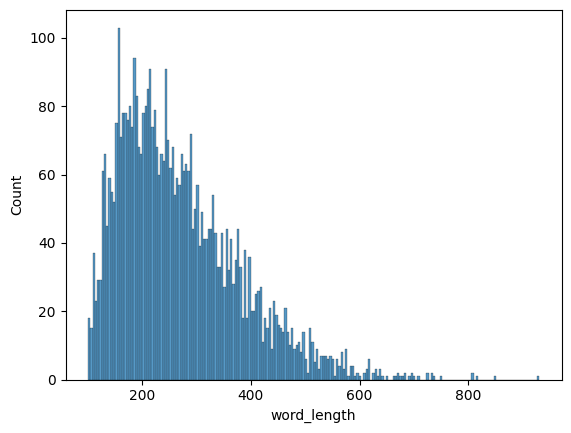

In [170]:
data_sohoa['word_length'] = data_sohoa['text'].apply(wl)
sns.histplot(data=data_sohoa, x="word_length", bins=200)

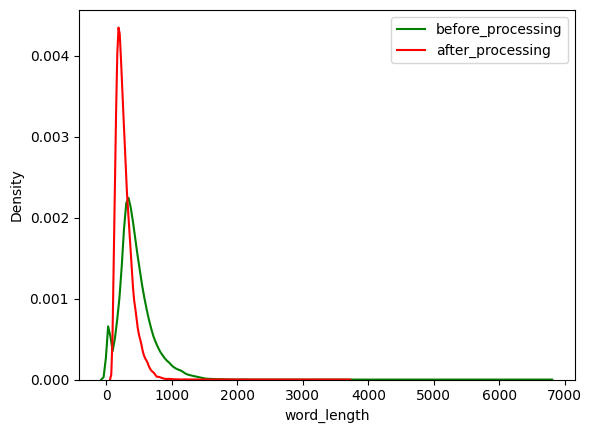

In [171]:
sns.kdeplot(df['word_length'],color='g')
sns.kdeplot(data_after123['word_length'],color='r')
plt.legend(['before_processing','after_processing'])

In [172]:
#chinhtri
data_chinhtri_visua = [] 
for i in data_chinhtri['text'].index:
  data_chinhtri_visua.append(data_chinhtri['text'][i])

#doisong
data_doisong_visua = [] 
for i in data_doisong['text'].index:
  data_doisong_visua.append(data_doisong['text'][i])

#khoahoc
data_khoahoc_visua = [] 
for i in data_khoahoc['text'].index:
  data_khoahoc_visua.append(data_khoahoc['text'][i])

#kinhdoanh
data_kinhdoanh_visua = [] 
for i in data_kinhdoanh['text'].index:
  data_kinhdoanh_visua.append(data_kinhdoanh['text'][i])

#phapluat
data_phapluat_visua = [] 
for i in data_phapluat['text'].index:
  data_phapluat_visua.append(data_phapluat['text'][i])

#suckhoe
data_suckhoe_visua = [] 
for i in data_suckhoe['text'].index:
  data_suckhoe_visua.append(data_suckhoe['text'][i])

#thegioi
data_thegioi_visua = [] 
for i in data_thegioi['text'].index:
  data_thegioi_visua.append(data_thegioi['text'][i])

#thethao
data_thethao_visua = [] 
for i in data_thethao['text'].index:
  data_thethao_visua.append(data_thethao['text'][i])

#giaitri
data_giaitri_visua = [] 
for i in data_giaitri['text'].index:
  data_giaitri_visua.append(data_giaitri['text'][i])

#sohoa
data_sohoa_visua = [] 
for i in data_sohoa['text'].index:
  data_sohoa_visua.append(data_sohoa['text'][i])    


In [173]:
data_chinhtri_visua_next=(','.join(data_chinhtri_visua))
data_doisong_visua_next=(','.join(data_doisong_visua))
data_khoahoc_visua_next=(','.join(data_khoahoc_visua))
data_kinhdoanh_visua_next=(','.join(data_kinhdoanh_visua))
data_phapluat_visua_next=(','.join(data_phapluat_visua))
data_suckhoe_visua_next=(','.join(data_suckhoe_visua))
data_thegioi_visua_next=(','.join(data_thegioi_visua))
data_thethao_visua_next=(','.join(data_thethao_visua))
data_giaitri_visua_next=(','.join(data_giaitri_visua))
data_sohoa_visua_next=(','.join(data_sohoa_visua))

In [174]:
from wordcloud import WordCloud
wc = WordCloud(
    background_color = 'white',
    max_words = 2000,
)

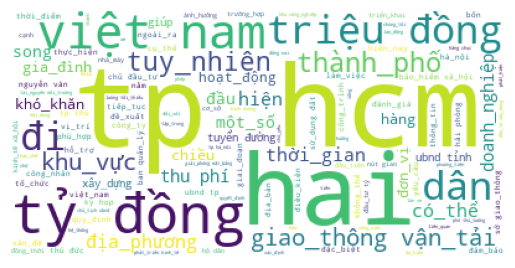

In [175]:
wc.generate(data_chinhtri_visua_next)
plt.figure()#figsize=(40, 30))
# Display image
plt.imshow(wc) 
# No axis 
plt.axis("off")
plt.show()

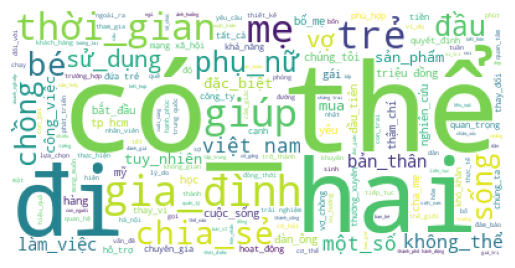

In [176]:
wc.generate(data_doisong_visua_next)
plt.figure()#figsize=(40, 30))
# Display image
plt.imshow(wc) 
# No axis 
plt.axis("off")
plt.show()

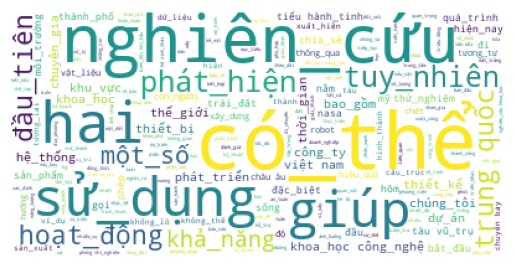

In [177]:
wc.generate(data_khoahoc_visua_next)
plt.figure()#figsize=(40, 30))
# Display image
plt.imshow(wc) 
# No axis 
plt.axis("off")
plt.show()

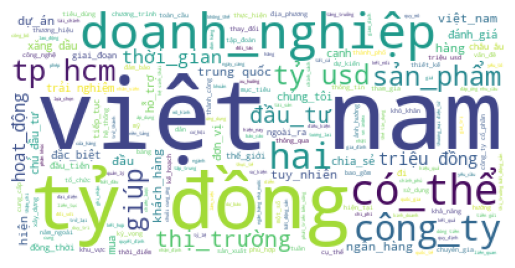

In [178]:
wc.generate(data_kinhdoanh_visua_next)
plt.figure()#figsize=(40, 30))
# Display image
plt.imshow(wc) 
# No axis 
plt.axis("off")
plt.show()

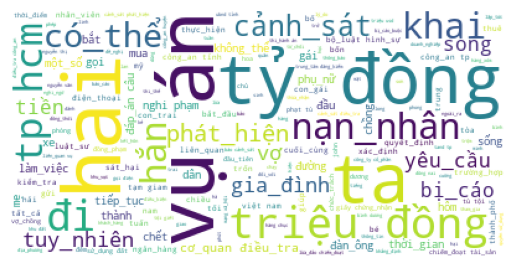

In [180]:
wc.generate(data_phapluat_visua_next)
plt.figure()#figsize=(40, 30))
# Display image
plt.imshow(wc) 
# No axis 
plt.axis("off")
plt.show()

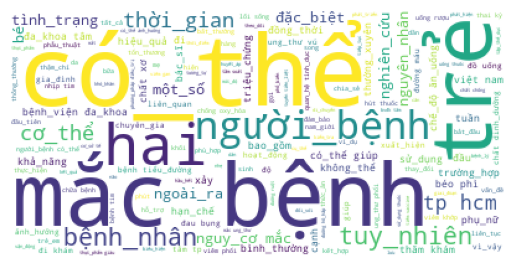

In [181]:
wc.generate(data_suckhoe_visua_next)
plt.figure()#figsize=(40, 30))
# Display image
plt.imshow(wc) 
# No axis 
plt.axis("off")
plt.show()

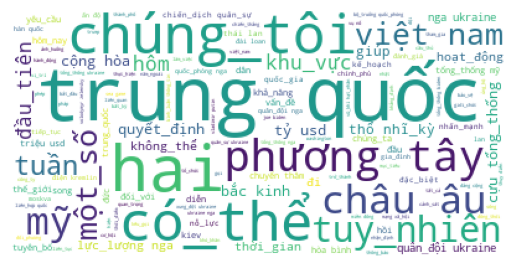

In [182]:
wc.generate(data_thegioi_visua_next)
plt.figure()#figsize=(40, 30))
# Display image
plt.imshow(wc) 
# No axis 
plt.axis("off")
plt.show()

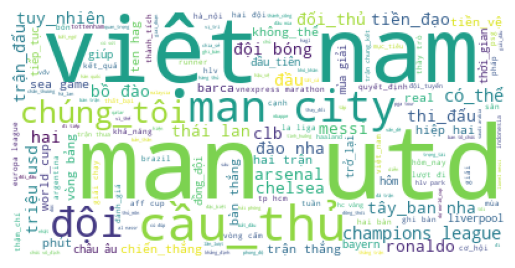

In [183]:
wc.generate(data_thethao_visua_next)
plt.figure()#figsize=(40, 30))
# Display image
plt.imshow(wc) 
# No axis 
plt.axis("off")
plt.show()

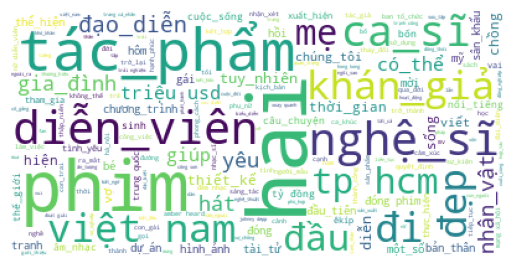

In [184]:
wc.generate(data_giaitri_visua_next)
plt.figure()#figsize=(40, 30))
# Display image
plt.imshow(wc) 
# No axis 
plt.axis("off")
plt.show()

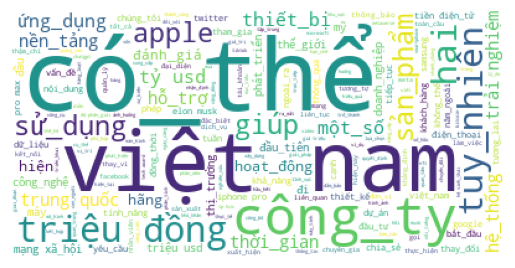

In [185]:
wc.generate(data_sohoa_visua_next)
plt.figure()#figsize=(40, 30))
# Display image
plt.imshow(wc) 
# No axis 
plt.axis("off")
plt.show()

In [113]:
chinhtri=[]
doisong=[]
khoahoc=[]
kinhdoanh=[]
phapluat=[]
suckhoe=[]
thegioi=[]
thethao=[]
Giaitri=[]
vitinh=[]


In [7]:
for i in range(len(X_data)):
    if (y_data[i] == 'Chinhtrixahoi'):
        chinhtri.append(X_data[i])
    if (y_data[i] == 'Doisong'):
        doisong.append(X_data[i])
    if (y_data[i] == 'Khoahoc'):
        khoahoc.append(X_data[i])
    if (y_data[i] == 'Kinhdoanh'):
        kinhdoanh.append(X_data[i])
    if (y_data[i] == 'Phapluat'):
        phapluat.append(X_data[i])
    if (y_data[i] == 'Suckhoe'):
        suckhoe.append(X_data[i])
    if (y_data[i] == 'Thegioi'):
        thegioi.append(X_data[i])
    if (y_data[i] == 'Thethao'):
        thethao.append(X_data[i])
    if (y_data[i] == 'Giaitri'):
        vanhoa.append(X_data[i])
    if (y_data[i] == 'Sohoa'):
        vitinh.append(X_data[i])
    

In [8]:
X_data

['cháy căn_hộ toà nhà_tầng sài_gòn lửa cháy dữ_dội căn_hộ tại tầng chung_cư nguyễn kim quận bốn người mắc_kẹt bên trong được cảnh_sát giương thang cao giải_cứu tối bán tạp_hóa đối_diện toà nhà cháy chị phạm phương cho biết khi hoả_hoạn căn_hộ phát ra nhiều tiếng nổ làm nhiều người hoảng_sợ ôm con nhỏ tháo_chạy xuống đất ban_đầu chỉ có khói nhưng sau đó lửa mới bùng_phát mạnh ra phía cửa_sổ chị phương nói sống tầng anh văn hoàng tuổi cho biết khi chuông báo_động vang lên_đèn tắt mọi người bật đèn led điện_thoại chạy ùa từ các tầng trên xuống vừa hô to báo_động cho những người khác lúc đầu một_số người nghĩ chung_cư bị cháy tầng hầm chứa xe_máy nên rất lo_sợ chung_cư cách trụ_sở cảnh_sát pccc quận chừng một km sau khi cháy chừng phút xe cứu_hoả cùng gần chiến_sĩ đến hiện_trường đại_tá huỳnh_quang tâm trưởng_phòng cảnh_sát pccc tp hcm trực_tiếp chỉ_đạo chữa_cháy giải_cứu nạn_nhân lính cứu_hoả nhanh_chóng giương thang cao gần giải_cứu người mắc_kẹt trước khi lửa bao_trùm căn_hộ song_song đ

In [7]:
sns.countplot(y=y_data)
plt.ylabel("Label")
plt.title("Sample count in each class")

NameError: name 'sns' is not defined

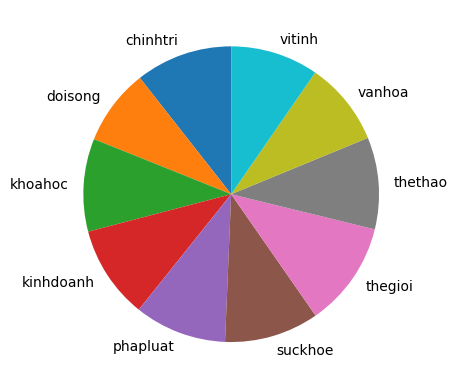

In [149]:
a= np.array([len(chinhtri), len(doisong), len(khoahoc), len(kinhdoanh),len(phapluat),len(suckhoe),len(thegioi),len(thethao),len(vanhoa),len(vitinh)])
mylabels = ["chinhtri", "doisong", "khoahoc", "kinhdoanh","phapluat","suckhoe","thegioi","thethao","vanhoa","vitinh"]
plt.pie(a, labels = mylabels, startangle = 90)
plt.show() 

In [3]:
def wl(text):
  return len(text.split(" "))
# chintri_split = chinhtri.apply(wl)
# #sns.histplot(data=chintri_split, x="word_length", bins=20)

In [8]:
a ='quảng_namđậu trước cây_xăng'
wl(a)

3